In [1]:
import numpy as np
import pandas as pd

In [2]:
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}

In [3]:
wine_data = pd.DataFrame(rowdata)
wine_data

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


In [4]:
X = np.array(wine_data.iloc[:,0:2])
X

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  4.8 ],
       [13.24,  4.32],
       [12.07,  2.76],
       [12.43,  3.94],
       [11.79,  3.  ],
       [12.37,  2.12],
       [12.04,  2.6 ]])

In [5]:
y = np.array(wine_data.iloc[:,-1])
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [6]:
new_data = np.array([12.8,4.1])

In [7]:
import matplotlib.pyplot as plt

In [8]:
X[y==1,0] 

array([12.07, 12.43, 11.79, 12.37, 12.04])

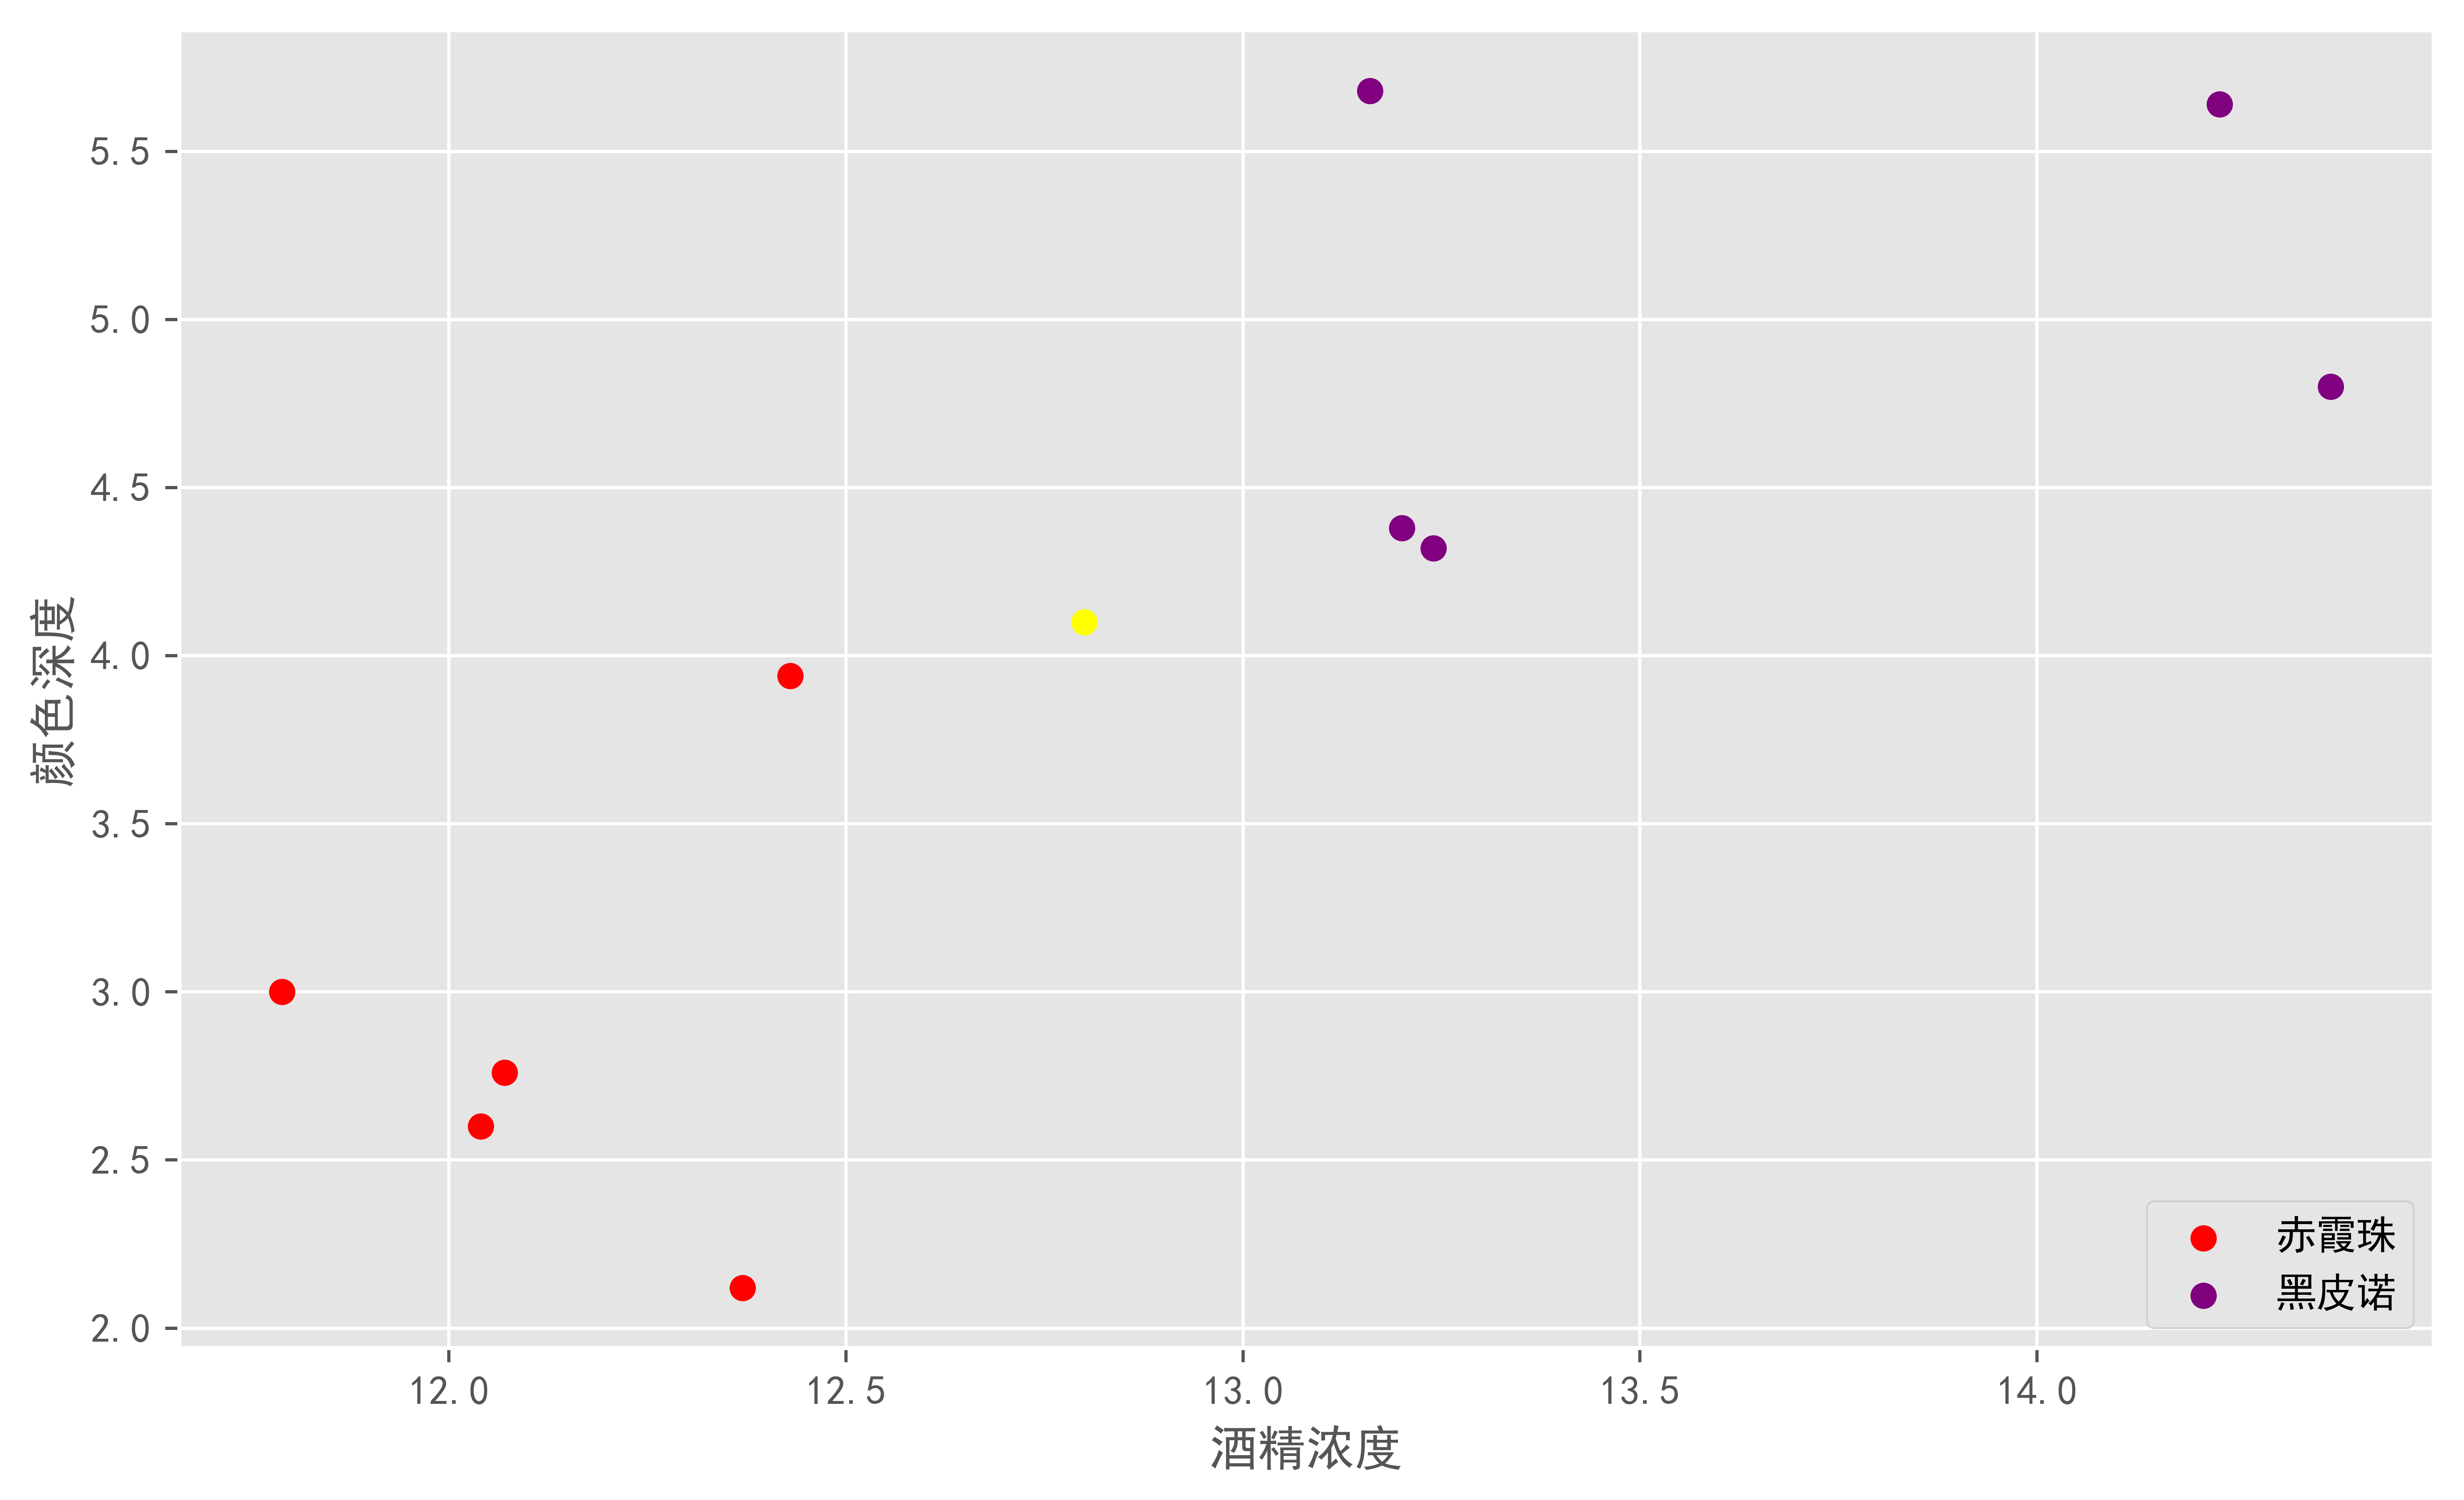

In [9]:
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
# plt.rcParams['font.family']='Arial Unicode MS' # mac中文显示
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.figure(figsize=(10,6),dpi=720)

plt.scatter(X[y==1,0], X[y==1,1], color='red', label='赤霞珠')
plt.scatter(X[y==0,0], X[y==0,1], color='purple', label='黑皮诺')
plt.scatter(new_data[0],new_data[1], color='yellow')

plt.xlabel('酒精浓度')
plt.ylabel('颜色深度')
plt.legend(loc='lower right')
plt.savefig('葡萄酒样本.png')

In [10]:
# 算距离
from math import sqrt

In [11]:
distance = [sqrt(np.sum((x-new_data)**2)) for x in X]
distance

[2.101547049199708,
 0.4882622246293471,
 1.6204937519163718,
 1.7189822570346662,
 0.49193495504995355,
 1.5259423318068084,
 0.4031128874149283,
 1.4933519344079622,
 2.026153992173349,
 1.6815469068687918]

In [12]:
# 找邻居
sort_dist = np.argsort(distance)
sort_dist

array([6, 1, 4, 7, 5, 2, 9, 3, 8, 0], dtype=int64)

In [13]:
[y[i] for i in sort_dist[:7]]

[1, 0, 0, 1, 1, 0, 1]

In [14]:
k = 3
topK = [y[i] for i in sort_dist[:k]]
topK

[1, 0, 0]

In [15]:
from collections import Counter

In [16]:
votes = Counter(topK)
votes

Counter({1: 1, 0: 2})

In [17]:
predict = votes.most_common(1)[0][0]
predict

0

In [18]:
def KNN(inx,dataset,k):
    import numpy as np
    import pandas as pd
    from math import sqrt
    from collections import Counter
    
    result=[]
    distance = [sqrt(np.sum((x-inx)**2)) for x in np.array(dataset.iloc[:,0:2])]
    sort_dist = np.argsort(distance)
    topK = [dataset.iloc[:,-1][i] for i in sort_dist[:k]]
    result.append(Counter(topK).most_common(1)[0][0])
    return result

In [19]:
KNN(new_data,wine_data,3)

[0]

### sklearn实现

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 实例化
clf = KNeighborsClassifier(n_neighbors=3)
# 训练模型
clf = clf.fit(X,y)
# 预测输出,返回预测的标签
result = clf.predict([[12.8,4.1]])
result

array([0], dtype=int64)

In [22]:
# 模型的评估，接口score返回预测的准确率
score = clf.score([[12.8,4.1]],[0])
score

1.0

In [23]:
# 返回预测的概率
clf.predict_proba([[12.8,4.1]])

array([[0.66666667, 0.33333333]])

### 数据集

In [24]:
from sklearn.datasets import load_breast_cancer

In [25]:
# 探索数据集
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [26]:
X = data.data
X.shape

(569, 30)

In [27]:
y = data.target
y.shape

(569,)

In [28]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
name = ['平均半径','平均纹理','平均周长','平均面积',
        '平均光滑度','平均紧凑度','平均凹度',
        '平均凹点','平均对称','平均分形维数',
        '半径误差','纹理误差','周长误差','面积误差',
        '平滑度误差','紧凑度误差','凹度误差',
        '凹点误差','对称误差',
        '分形维数误差','最差半径','最差纹理',
        '最差的边界','最差的区域','最差的平滑度',
        '最差的紧凑性','最差的凹陷','最差的凹点',
        '最差的对称性','最差的分形维数']

In [30]:
# 划分数据集

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2)

In [33]:
Xtrain.shape

(455, 30)

In [34]:
# 建模
clf = KNeighborsClassifier(n_neighbors=7)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtrain,Ytrain)

score

0.9340659340659341

In [35]:
clf.kneighbors(Xtest[[30,20],:],return_distance=True)

(array([[15.25653234, 17.21714528, 17.33909784, 18.52051989, 18.9807043 ,
         20.92173173, 21.62232957],
        [12.45465442, 15.30527574, 17.35703935, 18.09194074, 21.16300876,
         23.47914369, 23.88417629]]),
 array([[193, 278, 417, 195, 453, 216, 410],
        [ 50, 192, 129, 230, 240, 228, 286]], dtype=int64))

### 学习曲线

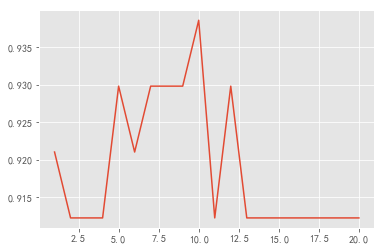

In [36]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2)

krange = range(1,21)
score=[]

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
plt.plot(krange,score)
plt.show()

In [37]:
score

[0.9210526315789473,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9298245614035088,
 0.9210526315789473,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9385964912280702,
 0.9122807017543859,
 0.9298245614035088,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859,
 0.9122807017543859]

In [38]:
score.index(max(score))+1

10

### 交叉验证

In [39]:
from sklearn.model_selection import cross_val_score as CVS

In [40]:
clf = KNeighborsClassifier(n_neighbors=5)
cvresult = CVS(clf,Xtrain,Ytrain,cv=5)
cvresult

array([0.93478261, 0.92391304, 0.94505495, 0.92222222, 0.94444444])

In [41]:
cvresult.mean()  # 模型的平均效果

0.9340834527791051

In [42]:
cvresult.var() # 模型是否稳定

9.446772514278373e-05

In [43]:
cvresult.std()

0.009719450866318721

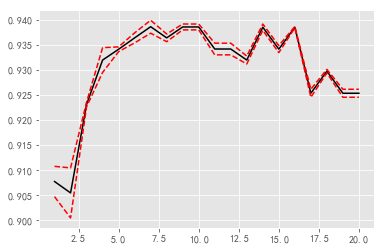

In [44]:
score=[]
var_ = []
krange = range(1,21)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,Xtrain,Ytrain,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_)*5,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*5,c='red',linestyle='--')

In [45]:
score.index(max(score))+1

7

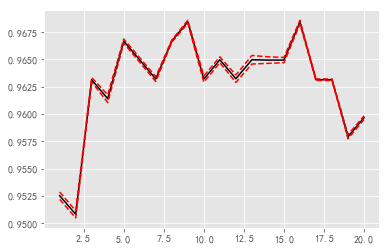

In [46]:
from sklearn.preprocessing import MinMaxScaler as mms
X_ = mms().fit_transform(X)

score=[]
var_ = []
krange = range(1,21)

for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,X_,y,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
    
plt.plot(krange,score,color='k')
plt.plot(krange,np.array(score)+np.array(var_),c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_),c='red',linestyle='--')

In [47]:
cvresult

array([0.93913043, 0.95652174, 0.97345133, 0.95575221, 0.97345133])

#### 小栗子

In [48]:
from sklearn.preprocessing import MinMaxScaler as mms

In [49]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [50]:
scaler = mms()
scaler = scaler.fit(data)   # max min 
result = scaler.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [51]:
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [52]:
x = np.array([[-1,2],[-0.5,6],[0,10],[1,18]])

In [53]:
x

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [54]:
x_ = (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

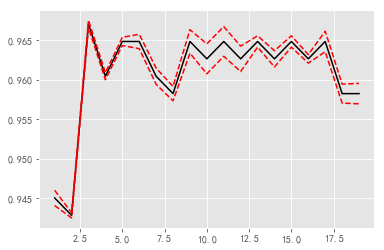

In [55]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,
                                            random_state=0)

MMS = mms().fit(Xtrain)
MMS_1 = mms().fit(Xtest)
X_train = MMS.transform(Xtrain)
X_test = MMS_1.transform(Xtest)

score = []
var_ = []
krange = range(1,20)
# 严谨地使用了验证集
for i in krange:
    clf = KNeighborsClassifier(n_neighbors=i)
    cvresult = CVS(clf,X_train,Ytrain,cv=5)
    score.append(cvresult.mean())
    var_.append(cvresult.var())
plt.plot(krange,score,color = 'k')
plt.plot(krange,np.array(score)+np.array(var_)*2,c='red',linestyle='--')
plt.plot(krange,np.array(score)-np.array(var_)*2,c='red',linestyle='--')

In [56]:
score.index(max(score))+1

3

In [57]:
# 测试模型
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,Ytrain)
score = clf.score(X_test,Ytest)
score

0.9210526315789473

In [58]:
clf = KNeighborsClassifier(n_neighbors=3,
                           weights='distance').fit(X_train,Ytrain)
score = clf.score(X_test,Ytest)
score

0.9210526315789473